PERFORMING PCA USING EIGENDECOMPOSITION

In [1]:
#Import statements 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 

import random 

random.seed(10)
np.random.seed(10)
sns.set_theme()

Getting our dataset

In [2]:
#2D Dataset 
artificial_df = pd.read_csv("pca_2d_dataset.csv")
artificial_df

,Feature 1,Feature 2
0,0,11.031906
1,2,10.816060
2,4,11.836182
3,6,17.749648
4,8,17.568312
5,22,33.133268
6,24,29.442606
7,26,31.040551
8,28,34.339725


Text(0.5, 1.0, 'Example artificial dataset plotting')

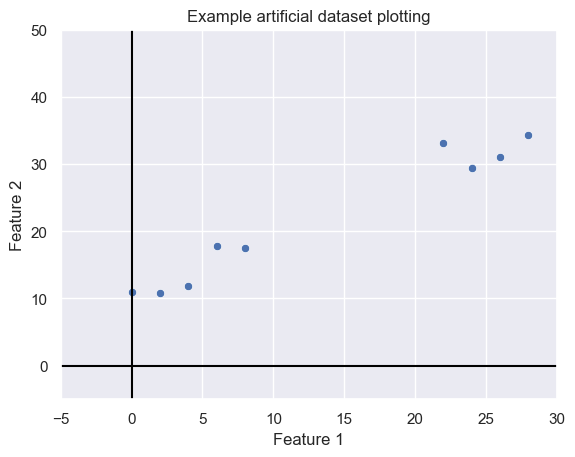

In [6]:
#Plot the data set graphically 
sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-5, 30])
plt.ylim([-5, 50])

plt.title('Example artificial dataset plotting')

In [7]:
#AFter scaling the data

In [8]:
artificial_df[:] = StandardScaler().fit_transform(artificial_df)
artificial_df

/var/folders/h2/hlt0n3hj3jx4phv5m7ncq2180000gn/T/ipykernel_1997/225558264.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.24034735 -1.05429524 -0.86824314 -0.68219104 -0.49613894  0.80622577
  0.99227788  1.17832998  1.36438208]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  artificial_df[:] = StandardScaler().fit_transform(artificial_df)


,Feature 1,Feature 2
0,-1.240347,-1.151346
1,-1.054295,-1.174245
2,-0.868243,-1.066019
3,-0.682191,-0.438648
4,-0.496139,-0.457886
5,0.806226,1.193429
6,0.992278,0.801880
7,1.178330,0.971409
8,1.364382,1.321425


Text(0.5, 1.0, 'Scaled artificial dataset plotting')

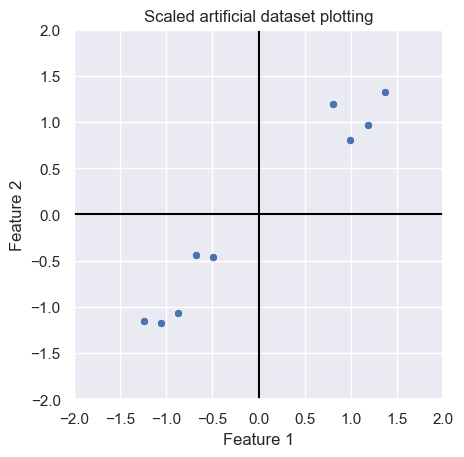

In [9]:
#Plot the data set graphically 
sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.gca().set_aspect('equal', adjustable='box')

plt.title('Scaled artificial dataset plotting')

In [10]:
#Calculate covariance matrix for our artificial dataframe
cov_matrix = artificial_df.cov().to_numpy()
cov_matrix

array([[1.125     , 1.10293497],
       [1.10293497, 1.125     ]])

In [11]:
#Calculate eigenvalues and eigenvectors of covariance matrix 
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [12]:
eigenvalues

array([2.22793497, 0.02206503])

In [13]:
eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Visualize principal components

Text(0.5, 1.0, 'PC1 and PC2 in original coordinates system')

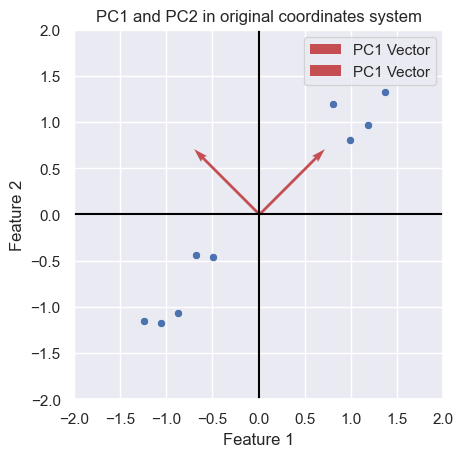

In [14]:
plt.figure()

sns.scatterplot(artificial_df, x='Feature 1', y='Feature 2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.quiver(
    0, 0,
    eigenvectors[:, 0][0],
    eigenvectors[:, 0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)
plt.quiver(
    0, 0,
    eigenvectors[:, 1][0],
    eigenvectors[:, 1][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinates system')

In [15]:
#PErform chnage of basis


In [16]:
transformed_data = eigenvectors.T @ artificial_df.to_numpy().T
transformed_data

array([[-1.69118235, -1.57581607, -1.36772953, -0.79255272, -0.6745976 ,
         1.41396972,  1.26866129,  1.5200951 ,  1.89915217],
       [ 0.06293368, -0.08481743, -0.13984831,  0.17221111,  0.02704881,
         0.27379429, -0.13463154, -0.14631514, -0.03037547]])

In [17]:

tranformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])
tranformed_df

,PC1,PC2
0,-1.691182,0.062934
1,-1.575816,-0.084817
2,-1.367730,-0.139848
3,-0.792553,0.172211
4,-0.674598,0.027049
5,1.413970,0.273794
6,1.268661,-0.134632
7,1.520095,-0.146315
8,1.899152,-0.030375


In [18]:

#Change basis for eigenvectors 
transformed_axis = eigenvectors.T @ eigenvectors
transformed_axis

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

Text(0.5, 1.0, 'PC1 and PC2 in original coordinates system')

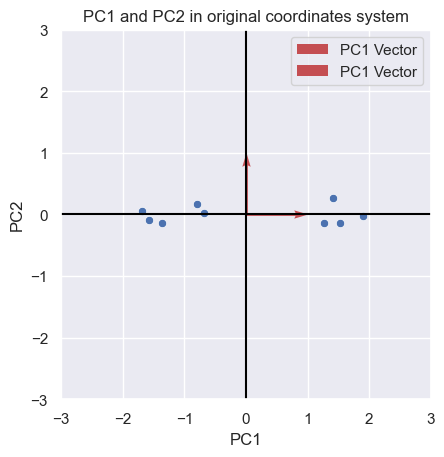

In [20]:

plt.figure()

sns.scatterplot(tranformed_df, x='PC1', y='PC2')

plt.hlines(xmin=-5, xmax=30, y=0, color='black')
plt.vlines(ymin=-5, ymax=50, x=0, color='black')

plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.quiver(
    0, 0,
    transformed_axis[0][0],
    transformed_axis[0][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)
plt.quiver(
    0, 0,
    transformed_axis[1][0],
    transformed_axis[1][1],
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('PC1 and PC2 in original coordinates system')

3D - Case Plotting

In [25]:
def plot_data_and_axis(data, eigenvectors=None, axis_min=None, axis_max=None, figsize=None):
    """
    This function plots data in a 3D coordinate system.
    It also plots coordinate system axis or arbitrary set of vectors.
    
    :param data: numpy dataset with 3 features
    :param eigenvectors: transposed eigenvector matrix
    :param axi_min: min value for each axis on the plot
    :param axis_max: max value for each axis on the plot
    """
    
    #CReate  3D figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    #Plot the data 
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.2)
    
    #Set axis labels 
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    #Set minimum and maximum value for axis
    if axis_min and axis_max:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_zlim(axis_min, axis_max)
    
    ax.view_init(elev=20, azim=-35, roll=0)
    
    #Choose which axis will be plotted (arrow tips)
    if eigenvectors is not None:
        plot_vectors = eigenvectors
    else:
        plot_vectors = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]
        
    #Always set orogin at [0, 0, 0] (arrow starting point)
    origin = [0, 0, 0]
    
    #Iterate over coordinate system arrows (three of them)
    for i, component in enumerate(plot_vectors):
        
        #Plot arrow
        ax.quiver(
            origin[0],
            origin[1],
            origin[2],
            component[0],
            component[1],
            component[2],
            color=['r', 'g', 'b'][i],
            lw=2
        )
        
    plt.show()

In [22]:
#Create 2D normaly distributed data 
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

#Create artificial dataset 
x_y_data = np.random.multivariate_normal(mean, cov, 500) 
z_col = 1.5*x_y_data[:, 1]

#Merge z col with x and y
np_data_3D = np.column_stack([x_y_data, z_col])

#Create datframe in order to display data 
df_3D = pd.DataFrame(np_data_3D, columns=['x', 'y', 'z'])
df_3D.head()


,x,y,z
0,-1.510827,-0.795548,-1.193322
1,1.342548,1.334164,2.001246
2,-0.178050,-0.898136,-1.347203
3,-0.284214,-0.175666,-0.263498
4,0.083584,-0.091017,-0.136525


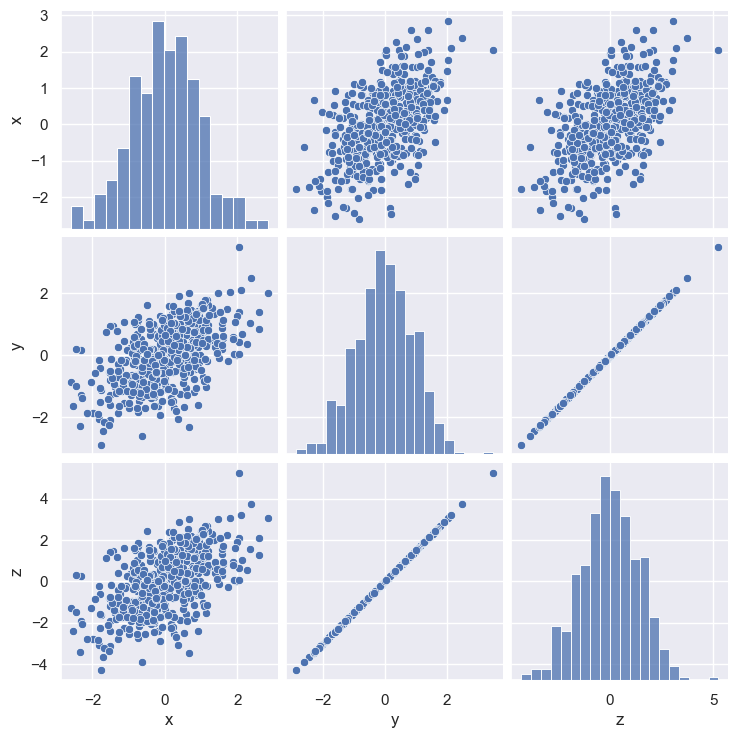

In [23]:
#Plotting the data 
sns.pairplot(df_3D)

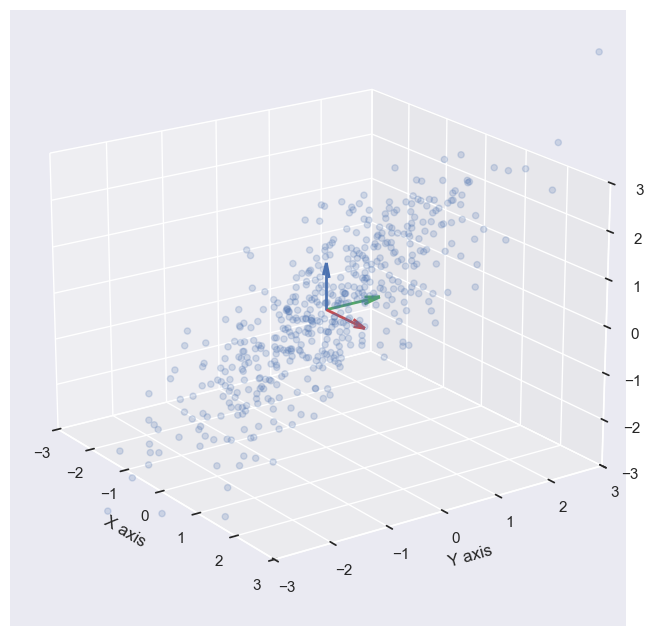

In [26]:
#Plot the data and original coordinate system 
plot_data_and_axis(data=np_data_3D,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))

Perform PCA

In [29]:
#Calculate covariance matrix
cov_mtx = df_3D.cov().to_numpy()

cov_mtx

array([[0.90523183, 0.4721996 , 0.7082994 ],
       [0.4721996 , 0.88894324, 1.33341486],
       [0.7082994 , 1.33341486, 2.00012229]])

In [30]:
#Getting eigenvectors and eigenvalues 
eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [31]:
eigenvalues

array([ 5.90029887e-01,  3.20426748e+00, -1.89085799e-16])

In [32]:
eigenvectors

array([[-9.37778614e-01,  3.47233740e-01, -6.49583220e-17],
       [ 1.92610624e-01,  5.20185981e-01, -8.32050294e-01],
       [ 2.88915936e-01,  7.80278972e-01,  5.54700196e-01]])

In [33]:
np.set_printoptions(suppress=True)
eigenvalues / np.sum(eigenvalues)*100

array([15.55043872, 84.44956128, -0.        ])

In [34]:
eigenvectors

array([[-0.93777861,  0.34723374, -0.        ],
       [ 0.19261062,  0.52018598, -0.83205029],
       [ 0.28891594,  0.78027897,  0.5547002 ]])

In [35]:
sort_idx = np.flip(np.argsort(eigenvalues))
sort_idx

array([1, 0, 2])

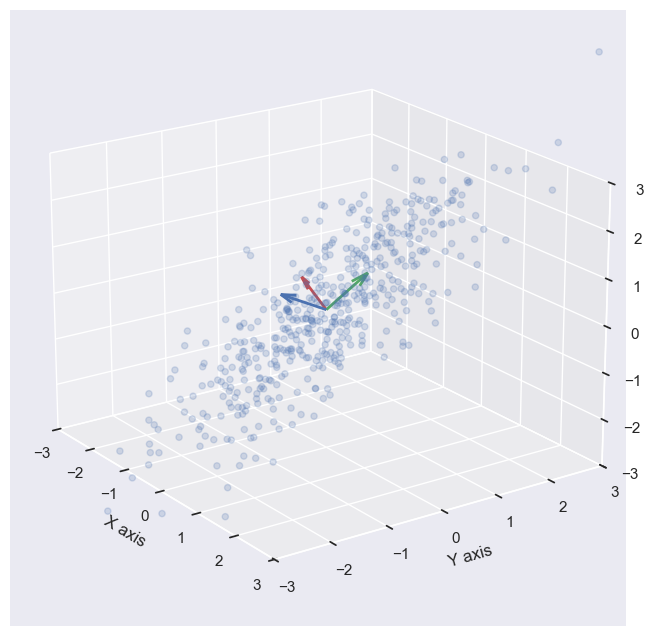

In [36]:
#Plot the data and original coordinate system 
plot_data_and_axis(data=np_data_3D,
                   eigenvectors=eigenvectors.T,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))                                                                         

In [37]:
#TRansform data to 2D
transformation_matrix = eigenvectors[:, :-1].T 
transformation_matrix

array([[-0.93777861,  0.19261062,  0.28891594],
       [ 0.34723374,  0.52018598,  0.78027897]])

In [38]:
transformed_data = transformation_matrix @ df_3D.to_numpy().T 
transformed_data

array([[ 0.91882057, -0.42384664, -0.3952475 ,  0.15656596, -0.13535791,
         1.05755918,  0.54339997,  0.40977997, -0.20124611, -0.44342248,
        -1.89714002,  1.93660669,  1.61121339,  1.11984003,  0.40621024,
        -0.50167601, -0.33645256,  0.50579328, -0.15592316, -0.23303881,
        -0.09606349, -0.63627105, -0.38356135,  0.15250473,  0.03733825,
         0.21904243,  0.40791826,  0.38659495,  1.36396595, -0.31349821,
        -0.4549868 , -0.24080843, -0.43575159, -0.82665085, -0.19319842,
         0.44660462,  0.71506959,  2.0144012 ,  0.07795684, -0.90615675,
         1.90025375, -0.67539282, -1.68452675,  0.29436096, -1.50071345,
         0.49030958, -0.6061726 ,  0.91022204, -0.06012866, -1.30488951,
        -1.45968442,  0.11808455, -0.35184295,  0.58327665, -0.42469157,
        -0.28901519,  0.07113044, -0.35725486, -0.00821982, -1.19180142,
        -1.18718659,  2.26139439,  0.64421587,  0.40652731,  0.96955985,
        -0.94526582,  0.07257457, -0.50441816,  0.3

In [39]:
tranformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])
tranformed_df

,PC1,PC2
0,0.918821,-1.869568
1,-0.423847,2.721721
2,-0.395247,-1.580217
3,0.156566,-0.395670
4,-0.135358,-0.124850
...,...,...
495,-1.375463,-1.964616
496,-0.037661,0.649572
497,-0.836393,-0.398315
498,1.036854,1.553311


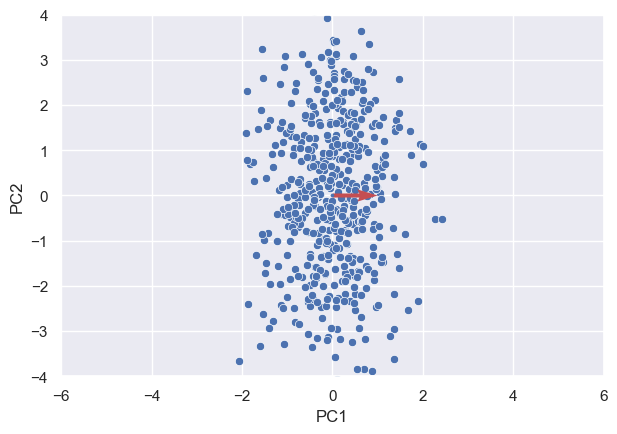

In [40]:
#Plot reduce data 
plt.figure(figsize=(7, 7))

sns.scatterplot(tranformed_df, x='PC1', y='PC2')


plt.xlim([-6, 6])
plt.ylim([-4, 4])


plt.quiver(
    0, 0,
    1,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)
plt.quiver(
    0, 0,
    0,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label='PC2 Vector'
)

plt.gca().set_aspect('equal', adjustable='box')
#plt.legend()
#plt.title('PC1 and PC2 in original coordinates system')